# Sales prediciton:
    Predict sale of each particular product at every store

In [158]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# load in the data
big_mart_df = pd.read_csv('./data.csv')

In [157]:
# an item can be sold among all stores
big_mart_df[big_mart_df.Item_Identifier == 'FDA15']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0              FDA15          9.3          Low Fat         0.016047     Dairy   
831            FDA15          9.3          Low Fat         0.016055     Dairy   
2599           FDA15          9.3          Low Fat         0.016019     Dairy   
2643           FDA15          9.3          Low Fat         0.016088     Dairy   
4874           FDA15          9.3          Low Fat         0.026818     Dairy   
5413           FDA15          9.3          Low Fat         0.016009     Dairy   
6696           FDA15          NaN          Low Fat         0.015945     Dairy   
7543           FDA15          9.3               LF         0.016113     Dairy   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0     249.8092            OUT049                       1999      Medium   
831   250.2092            OUT045                       2002         NaN   
2599  248.5092            OUT035                       2004       Small   
2643  249.6092            OUT018                       2009      Medium   
4874  248.9092            OUT010                       1998         NaN   
5413  250.6092            OUT013                       1987        High   
6696  249.5092            OUT027                       1985      Medium   
7543  248.8092            OUT017                       2007         NaN   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0                  Tier 1  Supermarket Type1          3735.1380  
831                Tier 2  Supermarket Type1          5976.2208  
2599               Tier 2  Supermarket Type1          6474.2392  
2643               Tier 3  Supermarket Type2          5976.2208  
4874               Tier 3      Grocery Store           498.0184  
5413               Tier 3  Supermarket Type1          6474.2392  
6696               Tier 3  Supermarket Type3          6474.2392  
7543               Tier 2  Supermarket Type1          5976.2208

In [5]:
big_mart_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

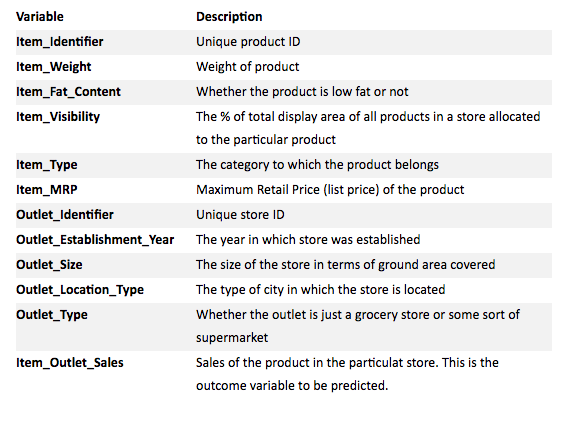

# Data Exploration and preparation:

In [6]:
# 1. Know the data types
big_mart_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [7]:
big_mart_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [147]:
# 2. univariate Analysis
from scipy.stats.mstats import mode
def get_descriptive_stats_continuous(input_df, column):
    """
    Function to print the descriptive statics of a give dataframe
    
    @Params:
        input_df: the input data frame which contains a column whose descriptive statics is to be calculated
        column: the name of the column whose descriptive statics is to be calculated.
        
    @Returns:
        desc_stat: a dictionary with the descriptive statistics
    """
    KEY_ORDER = ['count', 'min', 'max', 'mean', 'median','mode', 'std', 'variance', '25%', '50%', '75%', 'NaN_count', 'NaN_perc']
    desc_stat = {}
    desc_stat = input_df[column].describe().to_dict()
    desc_stat['variance'] = input_df[column].var()
    desc_stat['median'] = input_df[column].median()
    desc_stat['mode'] = mode(input_df[column])[0][0]
    desc_stat['NaN_count'] = input_df[column].isnull().sum() 
    desc_stat['NaN_perc'] = str(input_df[column].isnull().sum() / desc_stat['count']) + '%'
    print('---------------------DESCRIPTIVE STATICS '+column+' ---------------------')
    for key in KEY_ORDER:
        
        print(key +': '+str(desc_stat[key]) )
    print('-------------------------------------------------------------')
    return desc_stat

In [184]:
def get_histogram_box_plots(input_df, column):
    plt.subplots(1, 1, figsize=(8, 4))
    plt.hist(input_df[input_df[column].notnull()][column])
    plt.title(column +' Histogram')
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.subplots(1, 1, figsize=(8, 4))
    plt.boxplot(input_df[input_df[column].notnull()][column])
    plt.title(column +' Box Plot')
    plt.show()

In [185]:
def get_continuous_univariate_analysis(input_df, column):
    get_descriptive_stats_continuous(input_df, column)
    print('-------------------------------------------------------------')
    get_histogram_box_plots(input_df, column)

---------------------DESCRIPTIVE STATICS Item_Weight ---------------------
count: 7060.0
min: 4.555
max: 21.35
mean: 12.8576451841
median: 12.6
mode: 12.15
std: 4.64345649919
variance: 21.56168825983637
25%: 8.77375
50%: 12.6
75%: 16.85
NaN_count: 1463
NaN_perc: 0.207223796034%
-------------------------------------------------------------
-------------------------------------------------------------


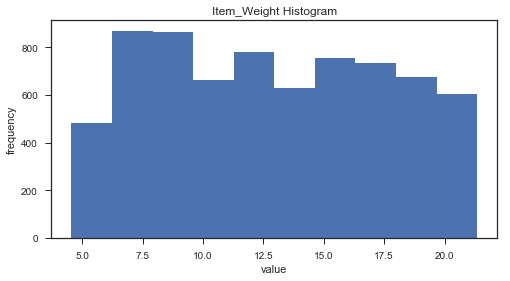

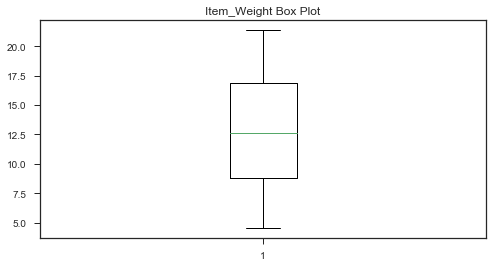

In [186]:
get_continuous_univariate_analysis(big_mart_df, 'Item_Weight')

In [142]:
# analysis for categorical values
def get_discrete_univariate_analysis(input_df, column):
    print('-------------'+column.upper()+'  DISTRIBUTION-----------------')
    rolled_up_df = input_df.groupby(column).size().reset_index(name='count').sort_values(['count'], ascending=False)
    count = rolled_up_df['count'].sum()
    rolled_up_df['perc'] = round((rolled_up_df['count'] / count) * 100, 2)
    rolled_up_df.index = range(1,len(rolled_up_df)+1)
    print(rolled_up_df)
    print('-------------------------------------------------------------')

In [143]:
get_discrete_univariate_analysis(big_mart_df, 'Item_Type')

-------------ITEM_TYPE  DISTRIBUTION-----------------
                Item_Type  count   perc
1   Fruits and Vegetables   1232  14.46
2             Snack Foods   1200  14.08
3               Household    910  10.68
4            Frozen Foods    856  10.04
5                   Dairy    682   8.00
6                  Canned    649   7.61
7            Baking Goods    648   7.60
8      Health and Hygiene    520   6.10
9             Soft Drinks    445   5.22
10                   Meat    425   4.99
11                 Breads    251   2.94
12            Hard Drinks    214   2.51
13                 Others    169   1.98
14          Starchy Foods    148   1.74
15              Breakfast    110   1.29
16                Seafood     64   0.75
-------------------------------------------------------------


# Do univariate analysis for all the columns:

In [144]:
big_mart_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [175]:
# discrete columns
# Item_Identifier is not here because it is a unique item identifier
# Outlet_Establishment_Year is in discrete columns list because it will only have a limited set of values, pandas
# recognizes it as a float
dis_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
          'Outlet_Type', 'Outlet_Establishment_Year']
# continuous columns
cont_col = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Univariate analysis for discrete colums:

In [193]:
for dis in dis_col:
    get_discrete_univariate_analysis(big_mart_df, dis)

-------------ITEM_FAT_CONTENT  DISTRIBUTION-----------------
  Item_Fat_Content  count   perc
1          Low Fat   5517  64.73
2          Regular   3006  35.27
-------------------------------------------------------------
-------------ITEM_TYPE  DISTRIBUTION-----------------
                Item_Type  count   perc
1   Fruits and Vegetables   1232  14.46
2             Snack Foods   1200  14.08
3               Household    910  10.68
4            Frozen Foods    856  10.04
5                   Dairy    682   8.00
6                  Canned    649   7.61
7            Baking Goods    648   7.60
8      Health and Hygiene    520   6.10
9             Soft Drinks    445   5.22
10                   Meat    425   4.99
11                 Breads    251   2.94
12            Hard Drinks    214   2.51
13                 Others    169   1.98
14          Starchy Foods    148   1.74
15              Breakfast    110   1.29
16                Seafood     64   0.75
--------------------------------------------

### notes:
    convert cases in Item_Fat_content, there is only 2 categories in this column Low Fat and Regular and some short hand notations of these.

In [192]:
# convert LF to Low Fat, reg to Regular and low fat to Low Fat
big_mart_df.Item_Fat_Content[big_mart_df.Item_Fat_Content == 'LF'] = 'Low Fat'
big_mart_df.Item_Fat_Content[big_mart_df.Item_Fat_Content == 'reg'] = 'Regular'
big_mart_df.Item_Fat_Content[big_mart_df.Item_Fat_Content == 'low fat'] = 'Low Fat'

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Univariate analysis for continuous colums:

---------------------DESCRIPTIVE STATICS Item_Weight ---------------------
count: 7060.0
min: 4.555
max: 21.35
mean: 12.8576451841
median: 12.6
mode: 12.15
std: 4.64345649919
variance: 21.56168825983637
25%: 8.77375
50%: 12.6
75%: 16.85
NaN_count: 1463
NaN_perc: 0.207223796034%
-------------------------------------------------------------
-------------------------------------------------------------


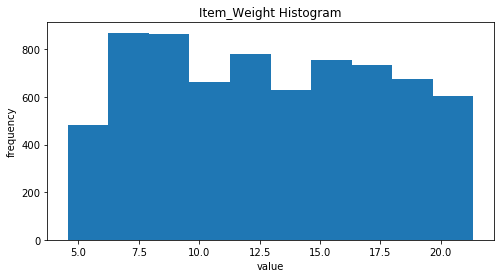

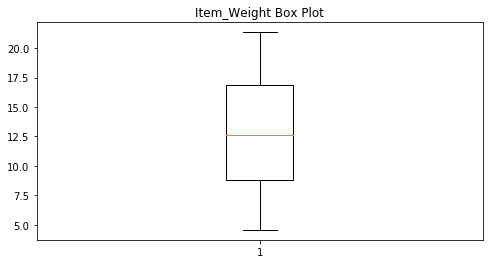

---------------------DESCRIPTIVE STATICS Item_Visibility ---------------------
count: 8523.0
min: 0.0
max: 0.328390948
mean: 0.066132028779
median: 0.05393093400000001
mode: 0.0
std: 0.0515978223211
variance: 0.0026623352682834376
25%: 0.0269894775
50%: 0.053930934
75%: 0.0945852925
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


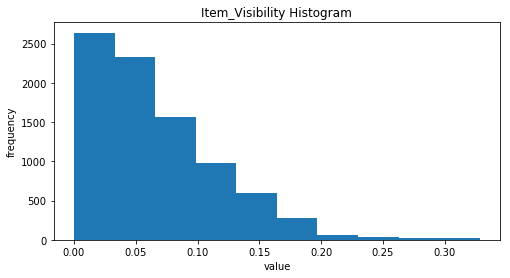

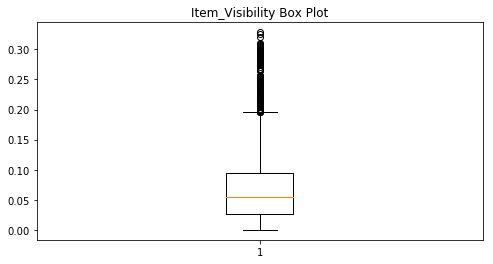

---------------------DESCRIPTIVE STATICS Item_MRP ---------------------
count: 8523.0
min: 31.29
max: 266.8884
mean: 140.992781978
median: 143.0128
mode: 172.0422
std: 62.2750665122
variance: 3878.1839090977373
25%: 93.8265
50%: 143.0128
75%: 185.6437
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


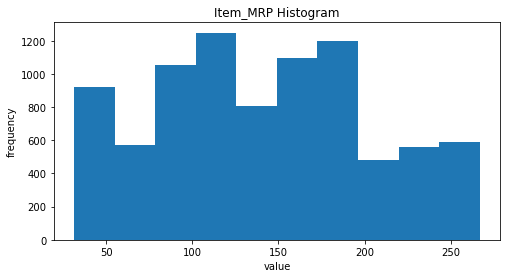

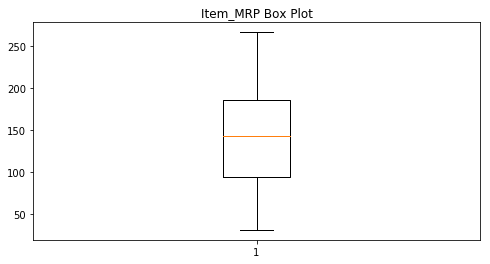

---------------------DESCRIPTIVE STATICS Item_Outlet_Sales ---------------------
count: 8523.0
min: 33.29
max: 13086.9648
mean: 2181.28891358
median: 1794.3310000000001
mode: 958.752
std: 1706.49961573
variance: 2912140.938499716
25%: 834.2474
50%: 1794.331
75%: 3101.2964
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


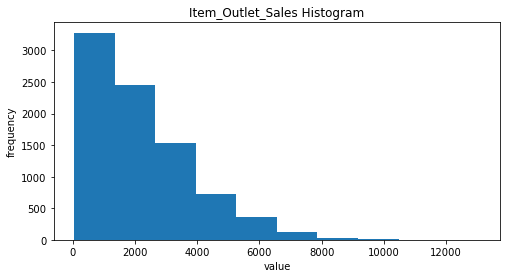

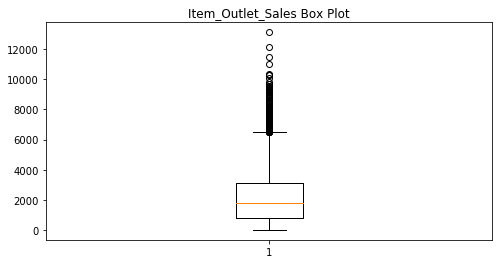

In [155]:
for cont in cont_col:
    get_continuous_univariate_analysis(big_mart_df, cont)

Note that the descriptive statistics are based on data across entire portfolio, not just one outlet.

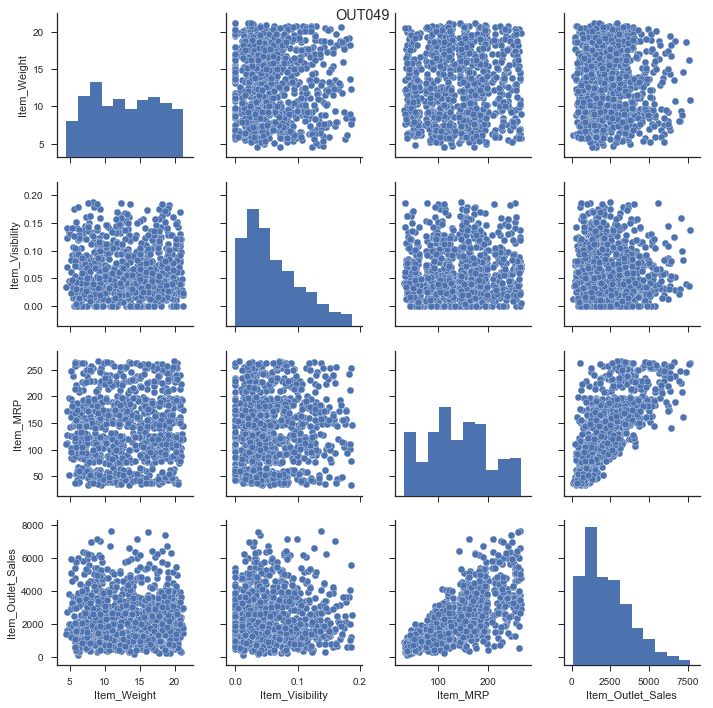

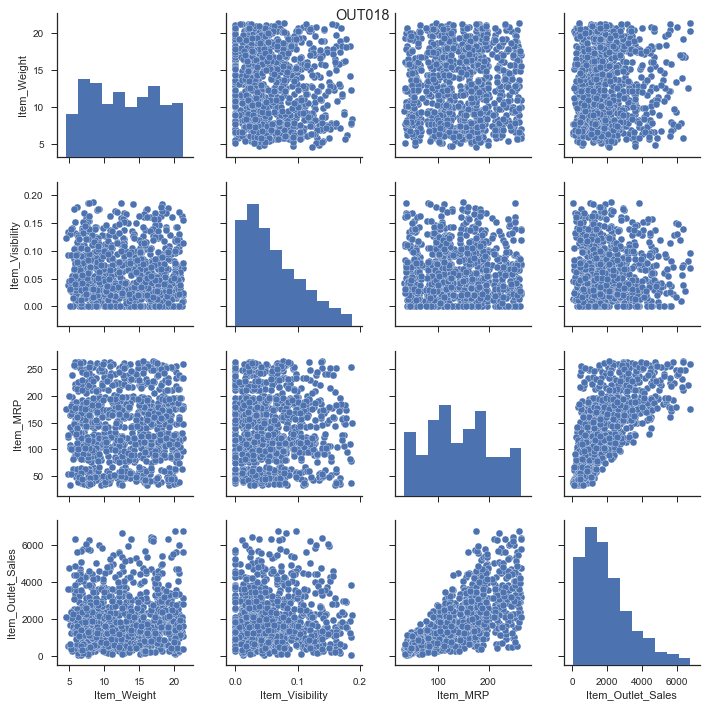

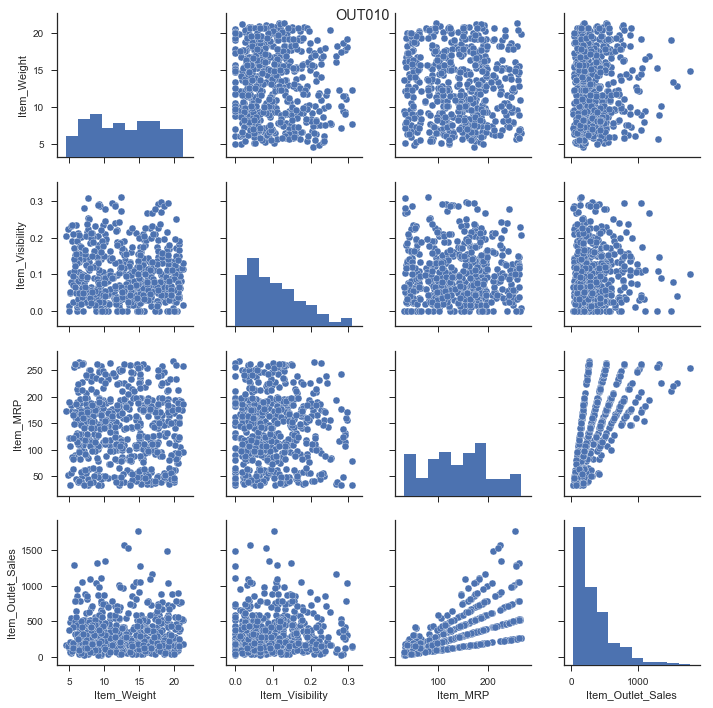

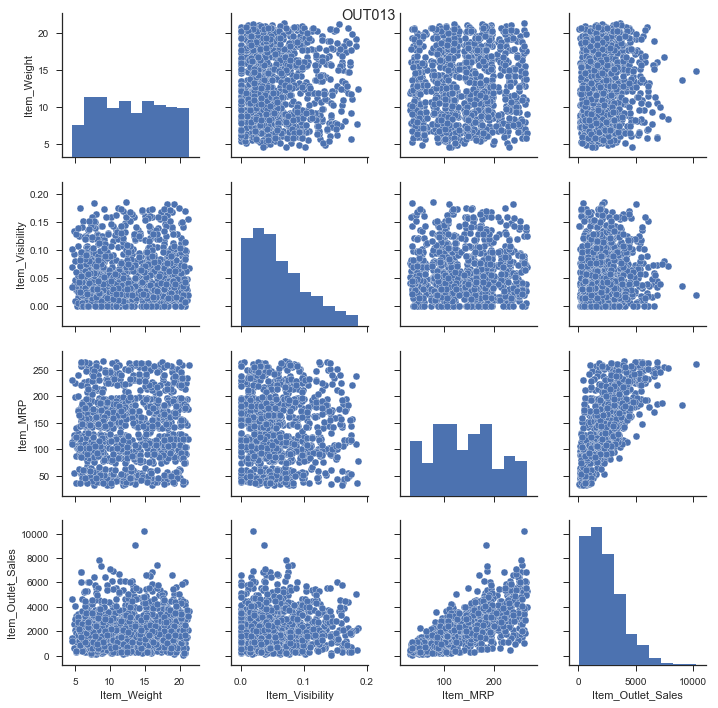

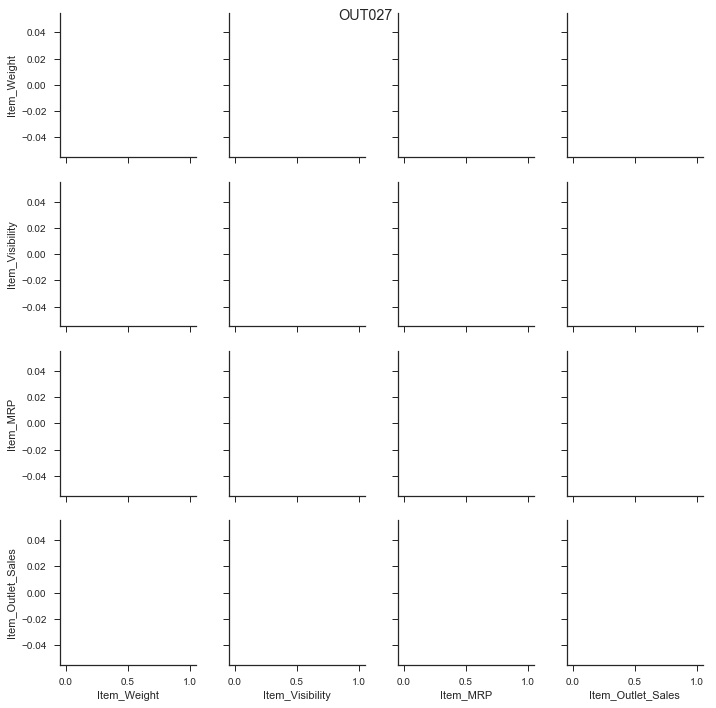

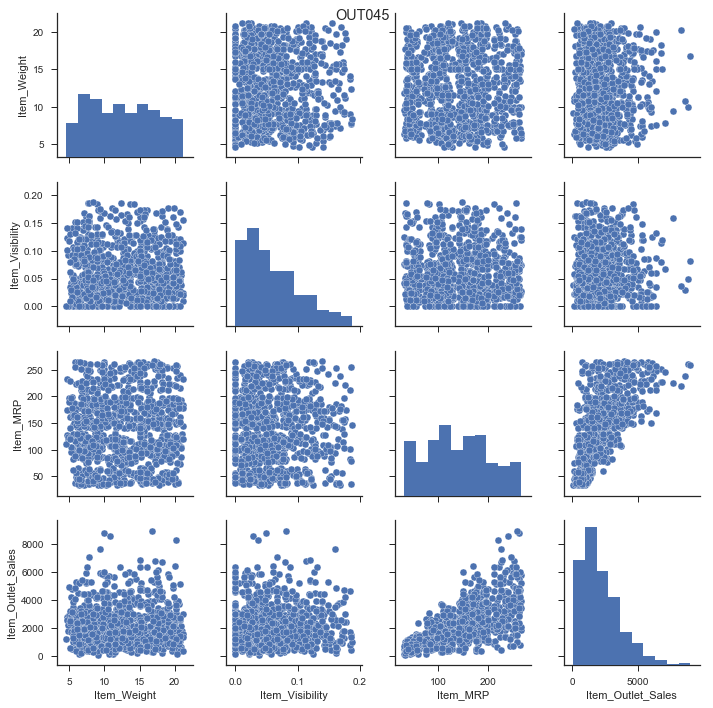

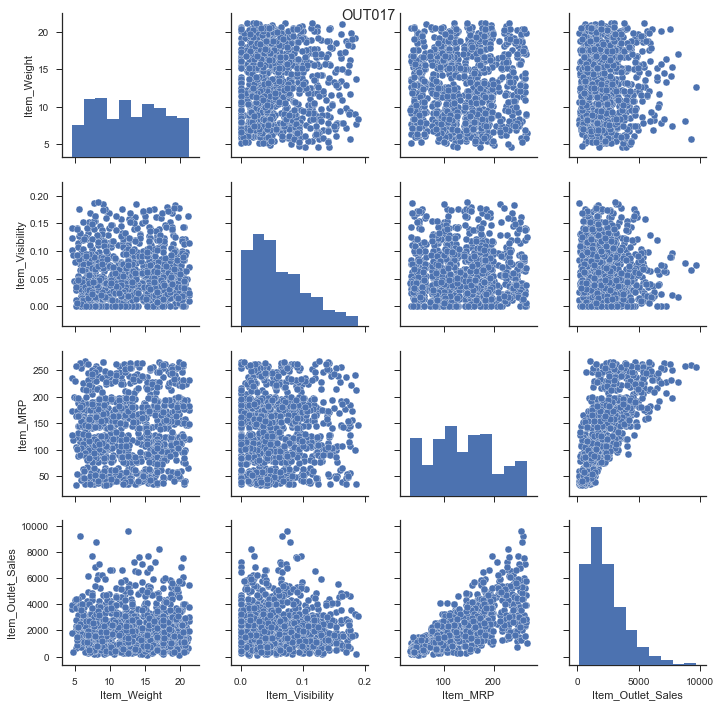

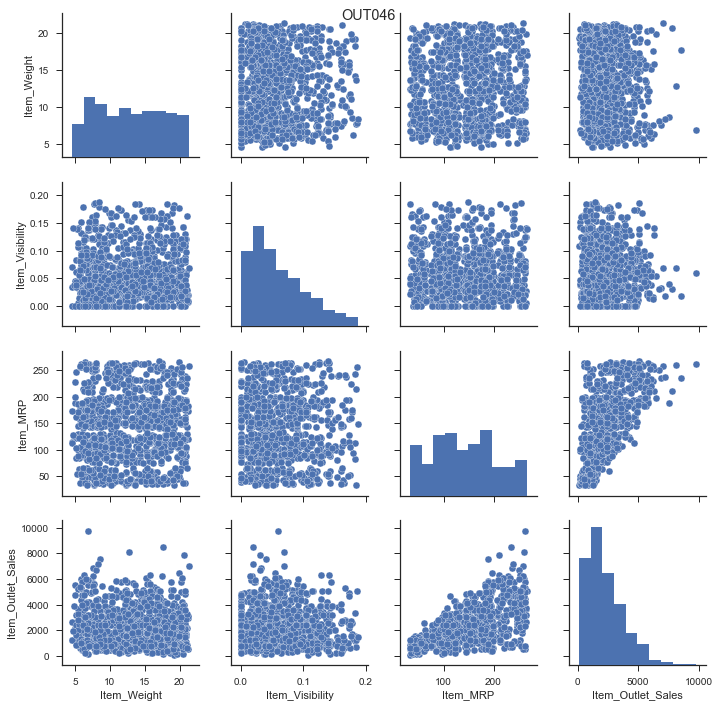

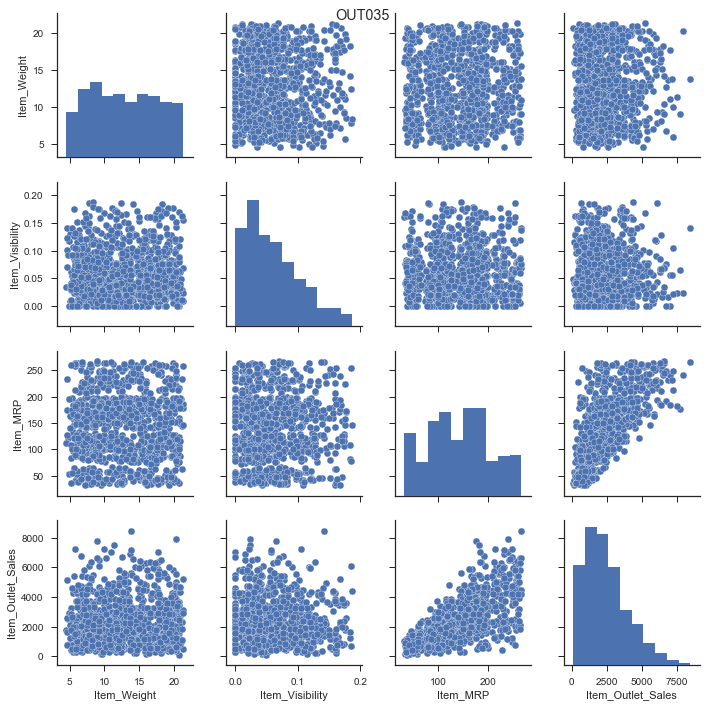

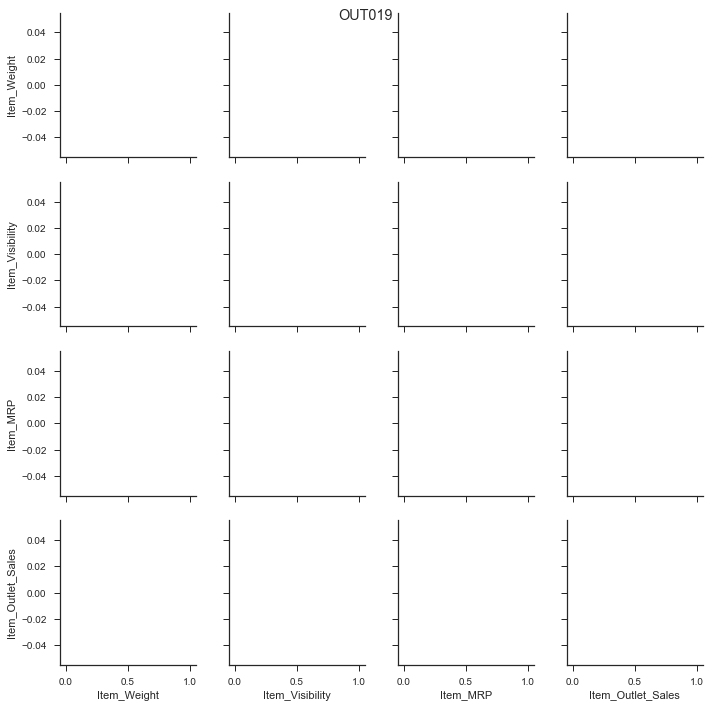

In [370]:
# Bivariate analysis
# we look at the scatter plots across the continuous variables
# it is better to look on an Outlet level
for outlet in big_mart_df['Outlet_Identifier'].unique().tolist():
    sns.pairplot(big_mart_df[big_mart_df.Outlet_Identifier == outlet][cont_col].dropna())
    plt.suptitle(outlet)

Some outlets are empty because they have NaN's, we will revisit this after missing value Imputation

In [180]:
# there is no clear visible correlation, we have to get the correlation coefficient between the columns
# correlation will be between -1 and 1
big_mart_df[cont_col].corr(method='pearson')

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
Item_Weight           1.000000        -0.014048  0.027141           0.014123
Item_Visibility      -0.014048         1.000000 -0.001315          -0.128625
Item_MRP              0.027141        -0.001315  1.000000           0.567574
Item_Outlet_Sales     0.014123        -0.128625  0.567574           1.000000

We see 
1. a high correlation between MRP and sales
2. as item visibility increases the outlet sales goes down, which is interesting because the common assumption would be that the higher the visibility the higher the sales.

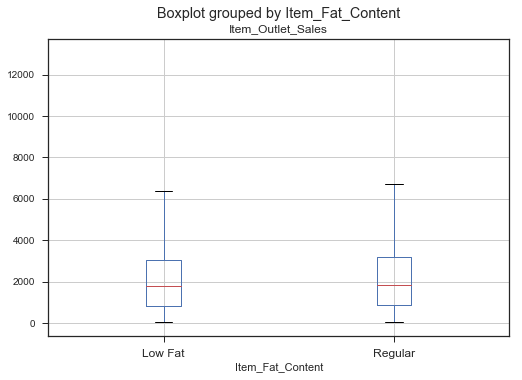

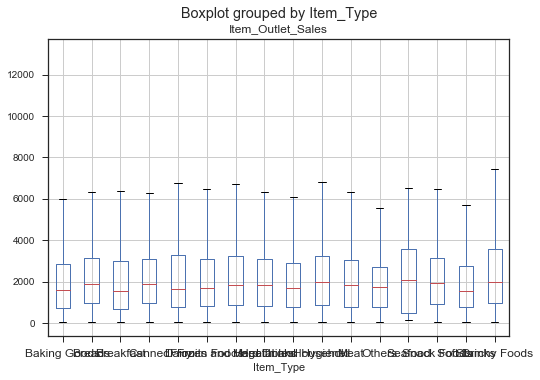

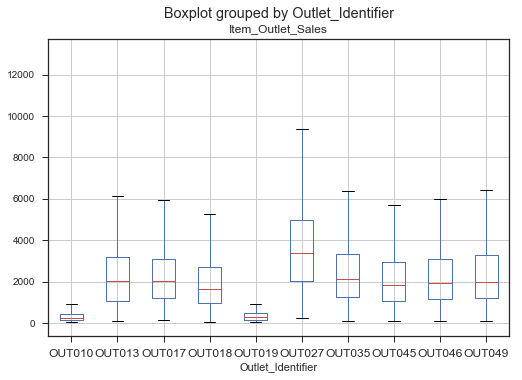

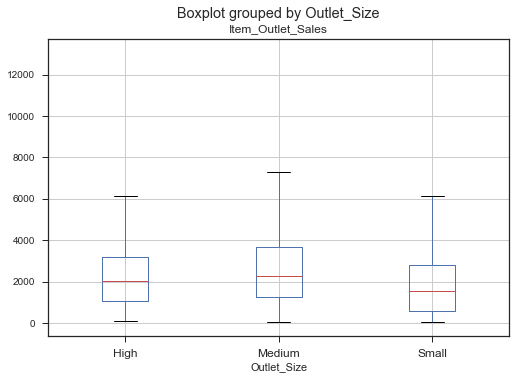

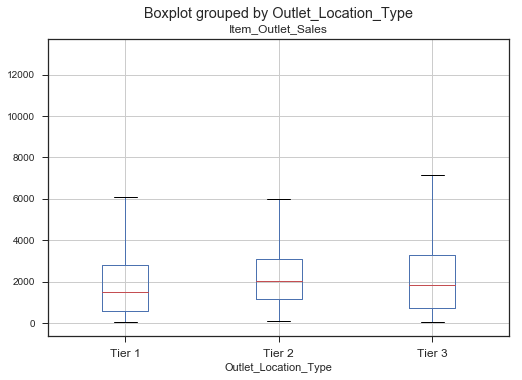

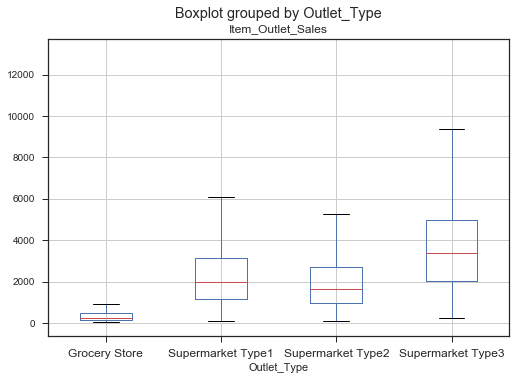

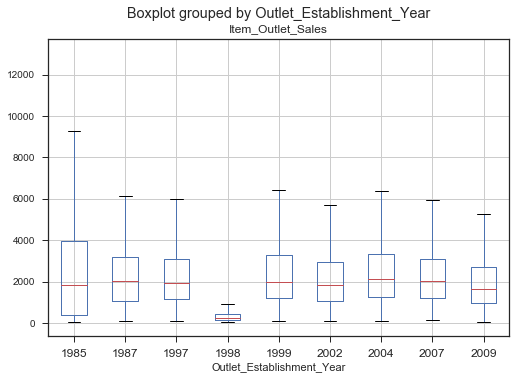

In [194]:
# we look at box plot of categorical variables against the continuous output variable
for dc in dis_col:
    big_mart_df.boxplot(column='Item_Outlet_Sales', by=dc)

In [223]:
# from visual inspection we can see the variables that may have statistically different means are 'Outlet_Identifier',
# 'Outlet_Type' and 'Outlet_Establishment_Year', for these lets use one way ANOVA to determine if our visual hypothesis is 
# correct.
from scipy.stats import f_oneway

In [250]:
# function to calculate one way ANOVA
def get_one_way_ANOVA(input_raw_df, discrete_column, continuous_column):
    # remove NaN value
    input_df = input_raw_df[[discrete_column, continuous_column]]
    input_df.dropna(inplace=True)
    # get the unique groups in the discrete column
    groups = input_df[discrete_column].unique().tolist()
    # get the individual groups as a list
    df_list = []
    for group in groups:
        df_list.append(input_df[input_df[discrete_column] == group][continuous_column])
    print('----------------------------'+discrete_column+'---------------------------------------------')
    anova_result = f_oneway(*df_list)
    print('F-Statistic: '+str(anova_result[0]))
    print('p_value: '+str(anova_result[1]))
    if anova_result[1] <= 0.05:
        print('The p value is less than 0.05 so we can reject the NULL hypothesis, which means population average of the different groups are different')
    else:
        print('The p value is greater than 0.05, we cannont reject NULL hypothesis, which means population average of the different groups are the same')
    print('------------------------------------------------------------------------------------------')

### Note if p <= 0.05 we can reject the null hypothesis (i.e the means are the same)
### A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
### p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.



In [252]:
multi_group_variables = ['Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year']
target = 'Item_Outlet_Sales'
for col in multi_group_variables:
    get_one_way_ANOVA(big_mart_df, col, target)

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


----------------------------Outlet_Identifier---------------------------------------------
F-Statistic: 300.079135328
p_value: 0.0
The p value is less than 0.05 so we can reject the NULL hypothesis, which means population average of the different groups are different
------------------------------------------------------------------------------------------
----------------------------Outlet_Type---------------------------------------------
F-Statistic: 894.650011902
p_value: 0.0
The p value is less than 0.05 so we can reject the NULL hypothesis, which means population average of the different groups are different
------------------------------------------------------------------------------------------
----------------------------Outlet_Establishment_Year---------------------------------------------
F-Statistic: 102.573452137
p_value: 6.74487788016e-164
The p value is less than 0.05 so we can reject the NULL hypothesis, which means population average of the different groups are differe

This means that 
    1. different outlets have different sales, expected
    2. different types of outlets have different sales, expected
    3. the year of outlet establishment also has an effect on sales, not entirely expected
    
  We can do a post analysis of the columns to figure out which groups differ
  
  ref: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

In [263]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def get_tukey_test(input_df, discrete_column, continuous_column, alpha =0.05):
    print('-----------------------------------'+discrete_column+' Tukey Test --------------------------------')
    tukey = pairwise_tukeyhsd(endog=input_df[continuous_column],     # Data
                              groups=input_df[discrete_column],      # Groups
                              alpha=alpha)                           # Significance level
    
    print(tukey.summary())              # See test summary

In [264]:
multi_group_variables = ['Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year']
target = 'Item_Outlet_Sales'
for col in multi_group_variables:
    get_tukey_test(big_mart_df, col, target)

-----------------------------------Outlet_Identifier Tukey Test --------------------------------
  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
OUT010 OUT013 1959.6436  1707.2275  2212.0596   True 
OUT010 OUT017 2001.3236  1748.6025  2254.0447   True 
OUT010 OUT018 1656.1471  1403.5281  1908.7661   True 
OUT010 OUT019   0.9781    -285.22    287.1761  False 
OUT010 OUT027 3354.6869   3102.422  3606.9518   True 
OUT010 OUT035 2099.4902  1846.9729  2352.0075   True 
OUT010 OUT045 1853.0331   1600.465  2105.6013   True 
OUT010 OUT046 1938.4926  1685.9753  2191.0099   True 
OUT010 OUT049  2009.003  1756.4856  2261.5203   True 
OUT013 OUT017   41.68    -176.7566   260.1166  False 
OUT013 OUT018 -303.4965   -521.815   -85.1781   True 
OUT013 OUT019 -1958.6655 -2215.0947 -1702.2363  True 
OUT013 OUT027 1395.0433  1177.1347  1612.9519   True 
OUT013 OUT035  139.8466   -78.3542   35

# Treat missing values:
    1. We have identifiers and their corresponding values in other records, use them to fill the NaN values.

In [276]:
for dis in dis_col:
    nan_val_cnt = len(big_mart_df[pd.isnull(big_mart_df[dis])])
    print('Column: '+dis+' has '+str(nan_val_cnt)+' missing values')

Column: Item_Fat_Content has 0 missing values
Column: Item_Type has 0 missing values
Column: Outlet_Identifier has 0 missing values
Column: Outlet_Size has 2410 missing values
Column: Outlet_Location_Type has 0 missing values
Column: Outlet_Type has 0 missing values
Column: Outlet_Establishment_Year has 0 missing values


In [277]:
for cont in cont_col:
    nan_val_cnt = len(big_mart_df[pd.isnull(big_mart_df[cont])])
    print('Column: '+cont+' has '+str(nan_val_cnt)+' missing values')

Column: Item_Weight has 1463 missing values
Column: Item_Visibility has 0 missing values
Column: Item_MRP has 0 missing values
Column: Item_Outlet_Sales has 0 missing values


We have missing values in Outlet_Size and Item_weight columns.
    1. Item_Weight can be filled using other entries for that Item (use Item_Identifier)
    2. Outlet_size can be filled using other entries for that Outlet (use Outlet_Identifier)

In [323]:
# get unique combinations of Item_Identifier and Item_Weight as key value pairs
id_weight_df = big_mart_df[['Item_Identifier', 'Item_Weight']].drop_duplicates().dropna()
# get new df with filled item_weight columns
bd_df = pd.merge(left=big_mart_df.ix[:, big_mart_df.columns != 'Item_Weight']
, right=id_weight_df, left_on='Item_Identifier', right_on='Item_Identifier', how='left')
bd_df.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0           FDA15          Low Fat         0.016047                  Dairy   
1           DRC01          Regular         0.019278            Soft Drinks   
2           FDN15          Low Fat         0.016760                   Meat   
3           FDX07          Regular         0.000000  Fruits and Vegetables   
4           NCD19          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Item_Weight  
0               Tier 1  Supermarket Type1          3735.1380         9.30  
1               Tier 3  Supermarket Type2           443.4228         5.92  
2               Tier 1  Supermarket Type1          2097.2700        17.50  
3               Tier 3      Grocery Store           732.3800        19.20  
4               Tier 3  Supermarket Type1           994.7052         8.93

In [324]:
big_mart_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [325]:
bd_df.describe()

Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count      8523.000000  8523.000000                8523.000000   
mean          0.066132   140.992782                1997.831867   
std           0.051598    62.275067                   8.371760   
min           0.000000    31.290000                1985.000000   
25%           0.026989    93.826500                1987.000000   
50%           0.053931   143.012800                1999.000000   
75%           0.094585   185.643700                2004.000000   
max           0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  Item_Weight  
count        8523.000000  8519.000000  
mean         2181.288914    12.875420  
std          1706.499616     4.646098  
min            33.290000     4.555000  
25%           834.247400     8.785000  
50%          1794.331000    12.650000  
75%          3101.296400    16.850000  
max         13086.964800    21.350000

---------------------DESCRIPTIVE STATICS Item_Weight ---------------------
count: 8519.0
min: 4.555
max: 21.35
mean: 12.8754202371
median: 12.65
mode: 12.15
std: 4.64609839669
variance: 21.586230311757724
25%: 8.785
50%: 12.65
75%: 16.85
NaN_count: 4
NaN_perc: 0.000469538678249%
-------------------------------------------------------------
-------------------------------------------------------------


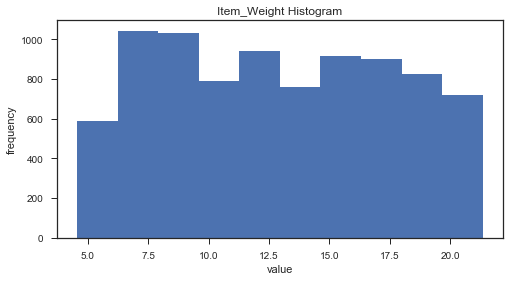

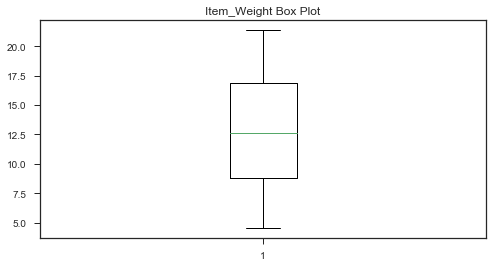

In [326]:
get_continuous_univariate_analysis(bd_df, 'Item_Weight')

We see that the now there are only 4 NaN's in the Item Weight column

Now repeat the process for Outlet Size

In [352]:
bd_df[['Outlet_Identifier', 'Outlet_Size']].drop_duplicates()

Outlet_Identifier Outlet_Size
0             OUT049      Medium
1             OUT018      Medium
3             OUT010         NaN
4             OUT013        High
7             OUT027      Medium
8             OUT045         NaN
9             OUT017         NaN
11            OUT046       Small
19            OUT035       Small
23            OUT019       Small

In [347]:
id_size_df = bd_df[['Outlet_Identifier', 'Outlet_Size']].drop_duplicates().dropna()

In [348]:
id_size_df

Outlet_Identifier Outlet_Size
0             OUT049      Medium
1             OUT018      Medium
4             OUT013        High
7             OUT027      Medium
11            OUT046       Small
19            OUT035       Small
23            OUT019       Small

In [349]:
bd_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Note that here we cannot use the same approach we used for Item Weight, because these Outlet_Identifiers dont have
Outlet_Size data for any records.

In [353]:
bd_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight'],
      dtype='object')

In [354]:
# get the outlet variables
bd_df[['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].drop_duplicates()

Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0             OUT049                       1999      Medium   
1             OUT018                       2009      Medium   
3             OUT010                       1998         NaN   
4             OUT013                       1987        High   
7             OUT027                       1985      Medium   
8             OUT045                       2002         NaN   
9             OUT017                       2007         NaN   
11            OUT046                       1997       Small   
19            OUT035                       2004       Small   
23            OUT019                       1985       Small   

   Outlet_Location_Type        Outlet_Type  
0                Tier 1  Supermarket Type1  
1                Tier 3  Supermarket Type2  
3                Tier 3      Grocery Store  
4                Tier 3  Supermarket Type1  
7                Tier 3  Supermarket Type3  
8                Tier 2  Supermarket Type1  
9                Tier 2  Supermarket Type1  
11               Tier 1  Supermarket Type1  
19               Tier 2  Supermarket Type1  
23               Tier 1      Grocery Store

We can approximate OUT045 and OUT017 are Small, from OUT035 which is very similar to the first two Outlets
OUT010 can be approximated as Small as well because it is a 'Grocery Store' and a 'Tier 3' city which means it might not be as big as a grocery store in a 'Tier 1' city.

## Note: this is an assumption which can be revisited if our model doesnt perform well

In [355]:
# fill Outlet_Size NaN's with 'Small'
bd_df['Outlet_Size'].fillna('Small', inplace=True)

In [357]:
bd_df[['Outlet_Identifier', 'Outlet_Size']].drop_duplicates()

Outlet_Identifier Outlet_Size
0             OUT049      Medium
1             OUT018      Medium
3             OUT010       Small
4             OUT013        High
7             OUT027      Medium
8             OUT045       Small
9             OUT017       Small
11            OUT046       Small
19            OUT035       Small
23            OUT019       Small

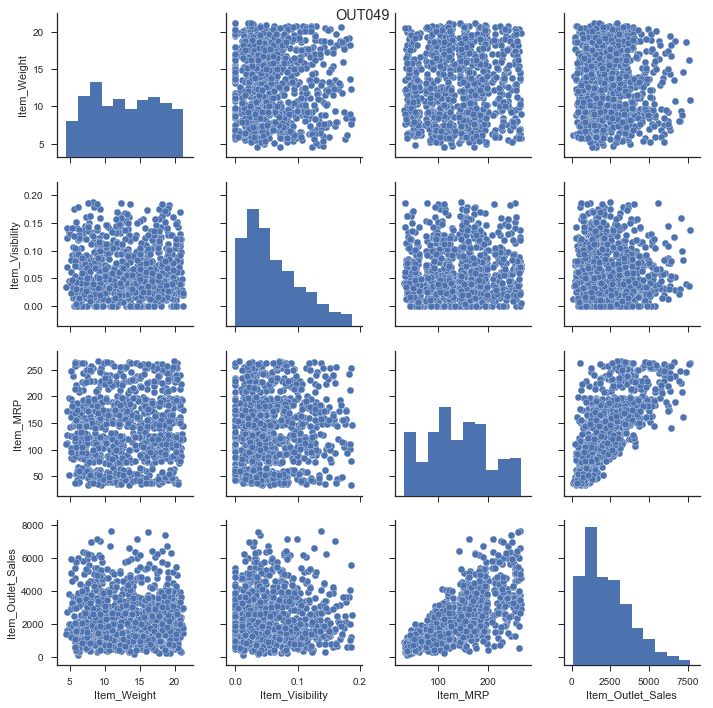

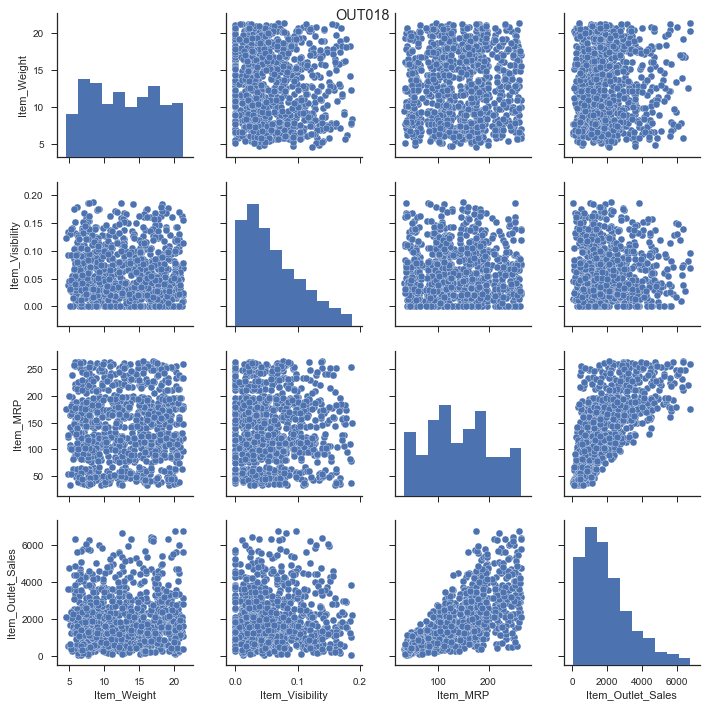

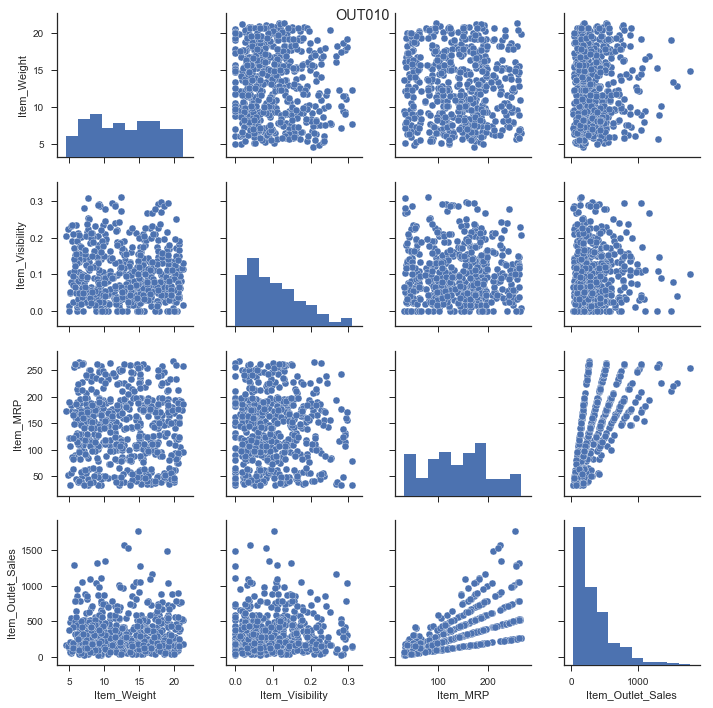

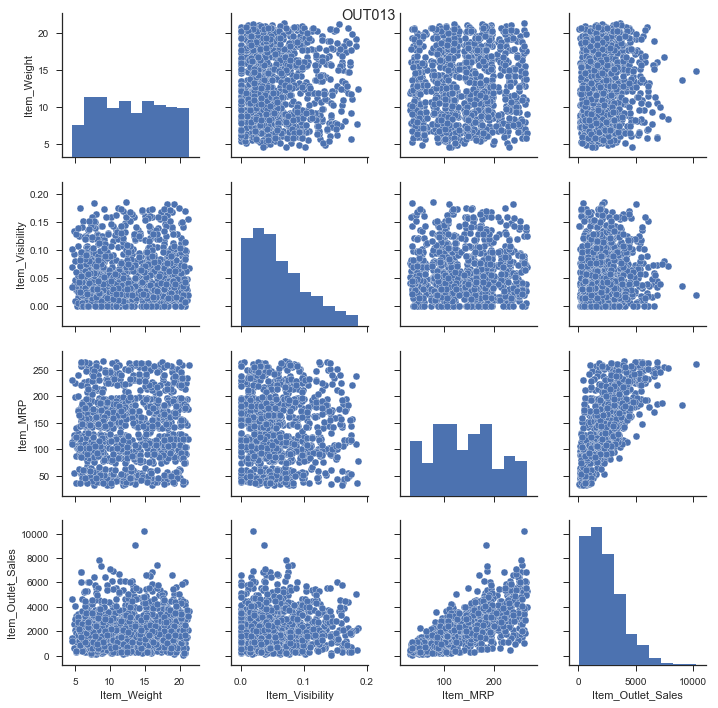

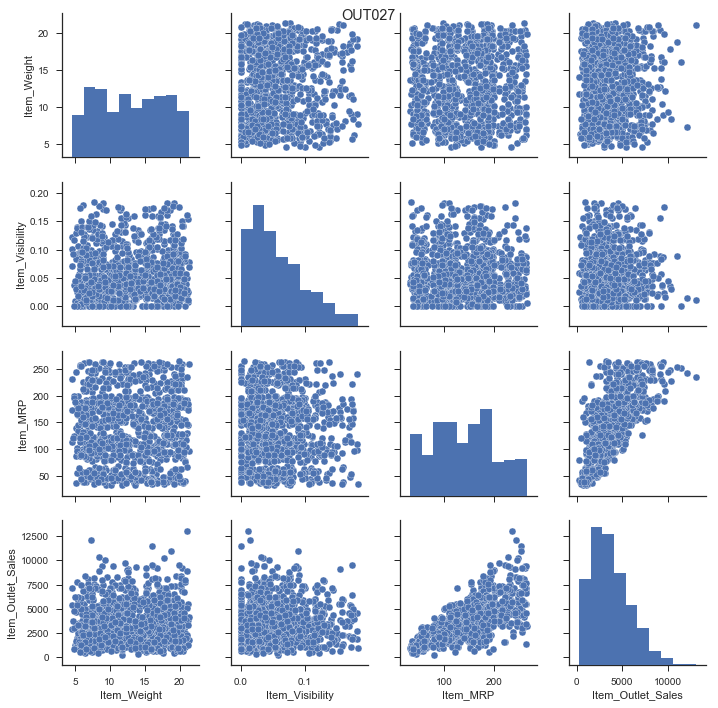

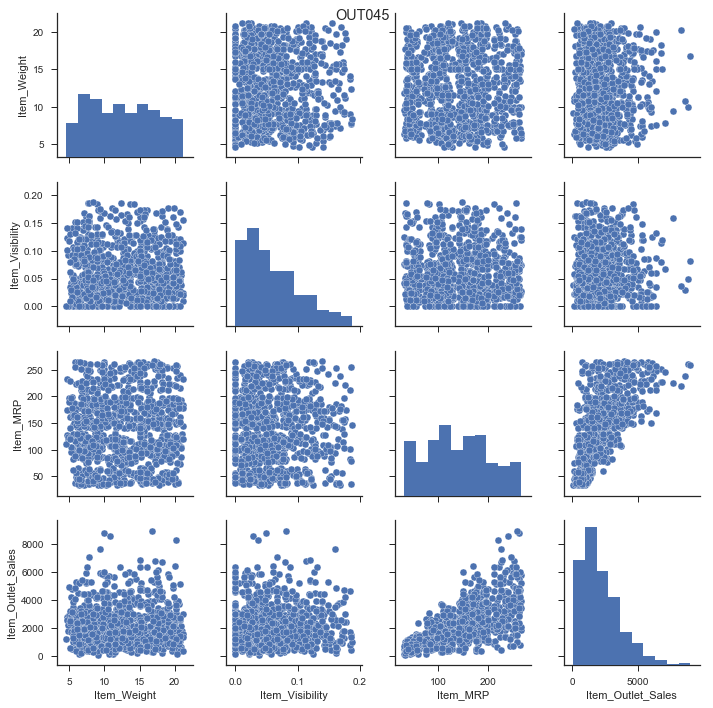

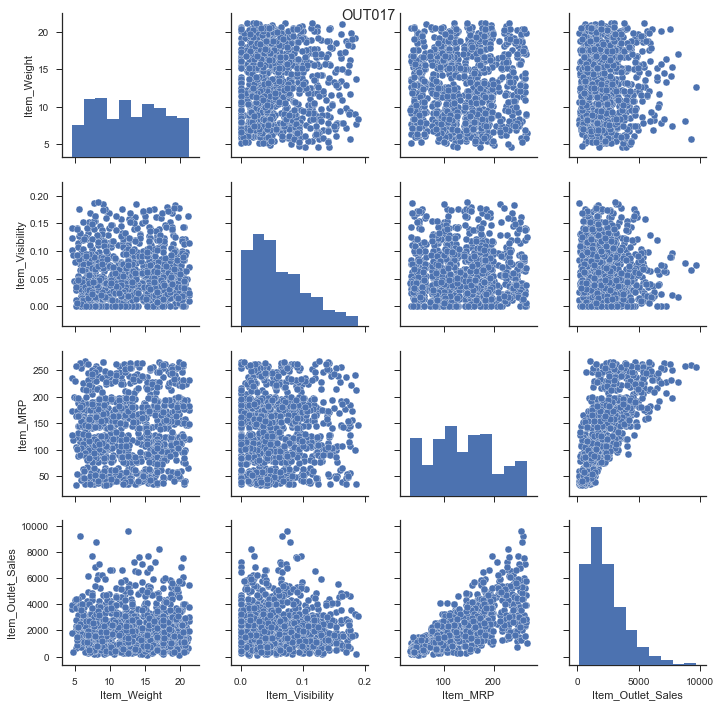

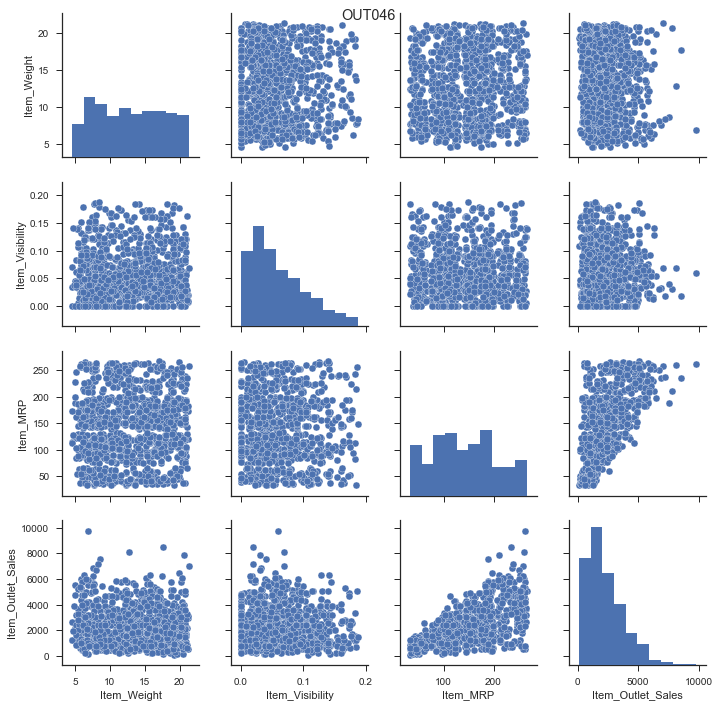

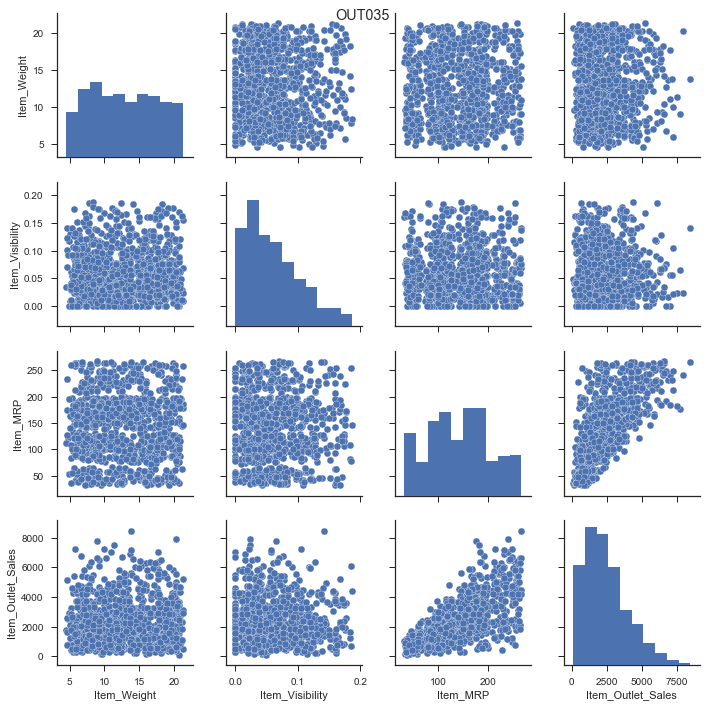

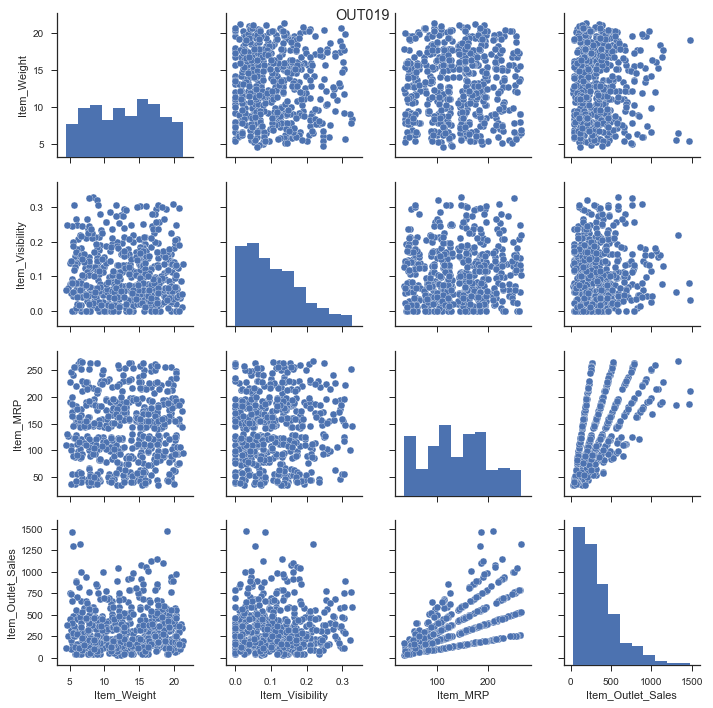

In [372]:
# Bivariate analysis
# we look at the scatter plots across the continuous variables
# it is better to look on an Outlet level
for outlet in bd_df['Outlet_Identifier'].unique().tolist():
    sns.pairplot(bd_df[big_mart_df.Outlet_Identifier == outlet][cont_col].dropna())
    plt.suptitle(outlet)

# Outlier Detection:

From visually inspecting the statistical description we can see that 'Item_Visibility' and 'Item_Outlet_Sales' have outliers, but we need to know that both of those variables have a skewed distribution, so box plots does not really do justice to these variables.

For now we are not performing any outlier detection and removal

# Feature Engineering:


In [364]:
bd_df.describe()

Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count      8523.000000  8523.000000                8523.000000   
mean          0.066132   140.992782                1997.831867   
std           0.051598    62.275067                   8.371760   
min           0.000000    31.290000                1985.000000   
25%           0.026989    93.826500                1987.000000   
50%           0.053931   143.012800                1999.000000   
75%           0.094585   185.643700                2004.000000   
max           0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  Item_Weight  
count        8523.000000  8519.000000  
mean         2181.288914    12.875420  
std          1706.499616     4.646098  
min            33.290000     4.555000  
25%           834.247400     8.785000  
50%          1794.331000    12.650000  
75%          3101.296400    16.850000  
max         13086.964800    21.350000

In [365]:
bd_df.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0           FDA15          Low Fat         0.016047                  Dairy   
1           DRC01          Regular         0.019278            Soft Drinks   
2           FDN15          Low Fat         0.016760                   Meat   
3           FDX07          Regular         0.000000  Fruits and Vegetables   
4           NCD19          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998       Small   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Item_Weight  
0               Tier 1  Supermarket Type1          3735.1380         9.30  
1               Tier 3  Supermarket Type2           443.4228         5.92  
2               Tier 1  Supermarket Type1          2097.2700        17.50  
3               Tier 3      Grocery Store           732.3800        19.20  
4               Tier 3  Supermarket Type1           994.7052         8.93

In [373]:
# We have to change scale of Item_MRP (normalize)
# Outlet_Establishment_Year - mapping to integers 
# transform non-linear relations into linear relations -- ???
# reduce skewness of distributions of 'Item_Visibility' and 'Item_Outlet_Sales' (square/cube/exponential, to reduce right skewness)
# binning - Item_Weight

In [375]:
# Normalize Item_MRP
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
bd_df['Item_MRP_Scaled'] = min_max_scaler.fit_transform(bd_df['Item_MRP'])

/Users/Kevin/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Kevin/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


---------------------DESCRIPTIVE STATICS Item_MRP_Scaled ---------------------
count: 8523.0
min: 0.0
max: 1.0
mean: 0.465634664659
median: 0.4742086533694626
mode: 0.597424260946
std: 0.264327204736
variance: 0.0698688711633596
25%: 0.26543686205
50%: 0.474208653369
75%: 0.65515597729
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


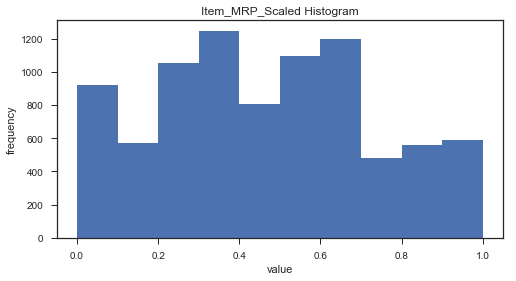

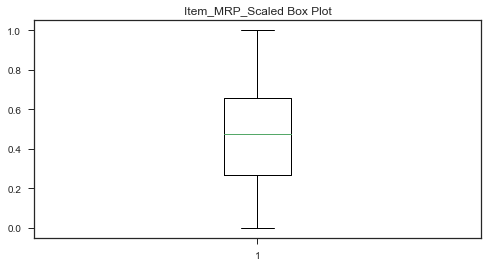

In [378]:
get_continuous_univariate_analysis(bd_df, 'Item_MRP_Scaled')

In [379]:
# Outlet_Establishment_Year - mapping to integers 
bd_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [382]:
Outlet_Establishment_Year = {1985: 1, 1987: 2, 1997: 3, 1998: 4, 1999: 5, 2002: 6, 
                            2004: 7, 2007: 8, 2009: 9}

In [385]:
bd_df['Outlet_Establishment_Year'].replace(Outlet_Establishment_Year, inplace=True)

In [386]:
bd_df.describe()

Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count      8523.000000  8523.000000                8523.000000   
mean          0.066132   140.992782                   4.790684   
std           0.051598    62.275067                   2.730322   
min           0.000000    31.290000                   1.000000   
25%           0.026989    93.826500                   2.000000   
50%           0.053931   143.012800                   5.000000   
75%           0.094585   185.643700                   7.000000   
max           0.328391   266.888400                   9.000000   

       Item_Outlet_Sales  Item_Weight  Item_MRP_Scaled  
count        8523.000000  8519.000000      8523.000000  
mean         2181.288914    12.875420         0.465635  
std          1706.499616     4.646098         0.264327  
min            33.290000     4.555000         0.000000  
25%           834.247400     8.785000         0.265437  
50%          1794.331000    12.650000         0.474209  
75%          3101.296400    16.850000         0.655156  
max         13086.964800    21.350000         1.000000

In [406]:
# reduce skewness of distributions of 'Item_Visibility' and 'Item_Outlet_Sales' (square/cube/exponential, to reduce right skewness)
# from the visual representation we can see 'Item_Visibility' should use square root
# and 'Item_Outlet_Sales' should use cube root
# the decision to use square and cube was based on the visual observation of skewness of the variables.
bd_df['Item_Visibility_unskew'] = np.sqrt(bd_df['Item_Visibility'])

In [407]:
bd_df['Item_Outlet_Sales_unskew'] = np.cbrt(bd_df['Item_Outlet_Sales'])

In [408]:
bd_df.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0           FDA15          Low Fat         0.016047                  Dairy   
1           DRC01          Regular         0.019278            Soft Drinks   
2           FDN15          Low Fat         0.016760                   Meat   
3           FDX07          Regular         0.000000  Fruits and Vegetables   
4           NCD19          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                          5      Medium   
1   48.2692            OUT018                          9      Medium   
2  141.6180            OUT049                          5      Medium   
3  182.0950            OUT010                          4       Small   
4   53.8614            OUT013                          2        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Item_Weight  \
0               Tier 1  Supermarket Type1          3735.1380         9.30   
1               Tier 3  Supermarket Type2           443.4228         5.92   
2               Tier 1  Supermarket Type1          2097.2700        17.50   
3               Tier 3      Grocery Store           732.3800        19.20   
4               Tier 3  Supermarket Type1           994.7052         8.93   

   Item_MRP_Scaled  Item_Visibility_unskew  Item_Outlet_Sales_unskew  
0         0.927507                0.126678                 15.515611  
1         0.072068                0.138846                  7.625576  
2         0.468288                0.129461                 12.800240  
3         0.640093                0.000000                  9.013888  
4         0.095805                0.000000                  9.982319

---------------------DESCRIPTIVE STATICS Item_Visibility_unskew ---------------------
count: 8523.0
min: 0.0
max: 0.573054053297
mean: 0.233709128535
median: 0.23223034685415256
mode: 0.0
std: 0.107300619212
variance: 0.011513422883334457
25%: 0.164284744911
50%: 0.232230346854
75%: 0.307547218542
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


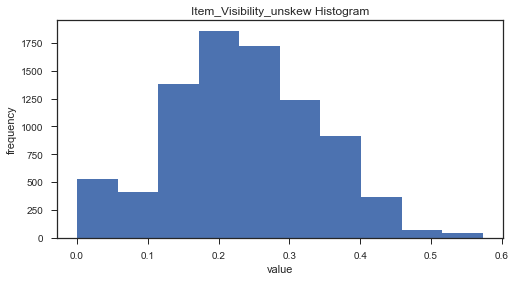

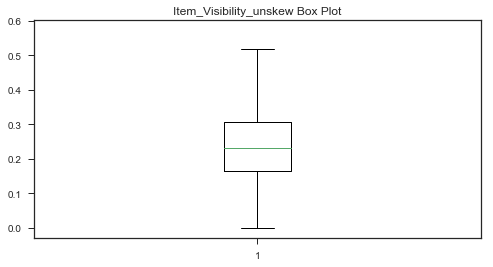

In [409]:
get_continuous_univariate_analysis(bd_df, 'Item_Visibility_unskew')

---------------------DESCRIPTIVE STATICS Item_Outlet_Sales_unskew ---------------------
count: 8523.0
min: 3.21690274815
max: 23.5656620227
mean: 11.9918398237
median: 12.15162018959164
mode: 9.86057167599
std: 3.58193473269
variance: 12.830256429226191
25%: 9.41379904401
50%: 12.1516201896
75%: 14.5830296347
NaN_count: 0
NaN_perc: 0.0%
-------------------------------------------------------------
-------------------------------------------------------------


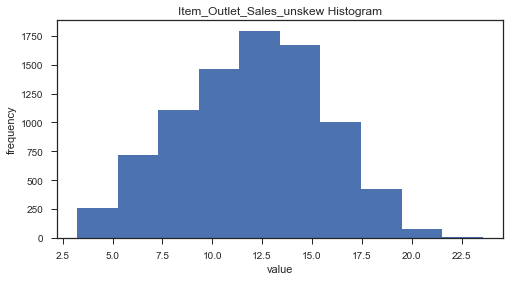

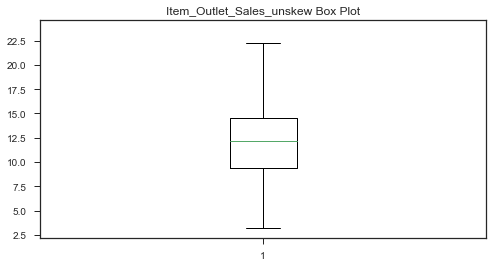

In [410]:
get_continuous_univariate_analysis(bd_df, 'Item_Outlet_Sales_unskew')

In [424]:
# binning - Item_Weight
bd_df['Item_Weight_Cut'] = pd.qcut(bd_df['Item_Weight'], 4, labels=[1,2,3,4])

In [425]:
bd_df.describe()

Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count      8523.000000  8523.000000                8523.000000   
mean          0.066132   140.992782                   4.790684   
std           0.051598    62.275067                   2.730322   
min           0.000000    31.290000                   1.000000   
25%           0.026989    93.826500                   2.000000   
50%           0.053931   143.012800                   5.000000   
75%           0.094585   185.643700                   7.000000   
max           0.328391   266.888400                   9.000000   

       Item_Outlet_Sales  Item_Weight  Item_MRP_Scaled  \
count        8523.000000  8519.000000      8523.000000   
mean         2181.288914    12.875420         0.465635   
std          1706.499616     4.646098         0.264327   
min            33.290000     4.555000         0.000000   
25%           834.247400     8.785000         0.265437   
50%          1794.331000    12.650000         0.474209   
75%          3101.296400    16.850000         0.655156   
max         13086.964800    21.350000         1.000000   

       Item_Visibility_unskew  Item_Outlet_Sales_unskew  
count             8523.000000               8523.000000  
mean                 0.233709                 11.991840  
std                  0.107301                  3.581935  
min                  0.000000                  3.216903  
25%                  0.164285                  9.413799  
50%                  0.232230                 12.151620  
75%                  0.307547                 14.583030  
max                  0.573054                 23.565662

In [426]:
bd_df.head()

Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0           FDA15          Low Fat         0.016047                  Dairy   
1           DRC01          Regular         0.019278            Soft Drinks   
2           FDN15          Low Fat         0.016760                   Meat   
3           FDX07          Regular         0.000000  Fruits and Vegetables   
4           NCD19          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                          5      Medium   
1   48.2692            OUT018                          9      Medium   
2  141.6180            OUT049                          5      Medium   
3  182.0950            OUT010                          4       Small   
4   53.8614            OUT013                          2        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Item_Weight  \
0               Tier 1  Supermarket Type1          3735.1380         9.30   
1               Tier 3  Supermarket Type2           443.4228         5.92   
2               Tier 1  Supermarket Type1          2097.2700        17.50   
3               Tier 3      Grocery Store           732.3800        19.20   
4               Tier 3  Supermarket Type1           994.7052         8.93   

   Item_MRP_Scaled  Item_Visibility_unskew  Item_Outlet_Sales_unskew  \
0         0.927507                0.126678                 15.515611   
1         0.072068                0.138846                  7.625576   
2         0.468288                0.129461                 12.800240   
3         0.640093                0.000000                  9.013888   
4         0.095805                0.000000                  9.982319   

  Item_Weight_Cut  
0               2  
1               1  
2               4  
3               4  
4               2